In [173]:
"""
=============================================================
- EE655000 Machine Learning HW3
-------------------------------------------------------------
- Subject: Handcraft 2-/3-Layer Neural Network
-------------------------------------------------------------
- Author: Jason Hao-Jiun Tu (107060011)
- Date: 2022.05.29
=============================================================
"""
import random
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os import listdir

class preprocess():
    def __init__(self):
        self.x_train = []
        self.y_train = []
        self.y_train_onehot = []
        self.x_test = []
        self.y_test = []
        self.y_test_onehot = []
    
    def load(self, path, label):
        for filename in listdir(path):
            #=== load image ===#
            img = Image.open(path + filename)
            img = np.array(img)
            print(f'=> load {filename} : {img.shape}')
            
            if label==0:
                label_onehot = [1, 0, 0]
            elif label==1:
                label_onehot = [0, 1, 0]
            elif label==2:
                label_onehot = [0, 0, 1]
            else:
                print('#=== ERROR ===# : Wrong labelling !')
                
            #=== store loaded image ===#
            if 'train' in path:
                self.x_train.append(img)
                self.y_train.append(label)
                self.y_train_onehot.append(label_onehot)
            elif 'test' in path:
                self.x_test.append(img)
                self.y_test.append(label)
                self.y_test_onehot.append(label_onehot)
            else:
                print('#=== ERROR ===# : Wrong path !')
                
        print(f'Total images: train={len(self.x_train)}, test={len(self.x_test)}')

    def shuffle(self):
        print(f'Before shuffle: \n {self.y_train}')
        zipped_train = list(zip(self.x_train, self.y_train, self.y_train_onehot))
        random.shuffle(zipped_train)
        self.x_train, self.y_train, self.y_train_onehot = zip(*zipped_train) # unzip
        print(f'After shuffle: \n {self.y_train}')
        
    def feature_scaling(self):
        x_train = np.array(self.x_train, dtype=np.float64)
        y_train = np.array(self.y_train)
        y_train_onehot = np.array(self.y_train_onehot)
        img_size, h, w, ch = x_train.shape
        x_train = x_train.reshape((img_size, h*w*ch))
        print(f'x_train shape: {x_train.shape}')
        
        x_test = np.array(self.x_test, dtype=np.float64)
        y_test = np.array(self.y_test)
        y_test_onehot = np.array(self.y_test_onehot)
        img_size, h, w, ch = x_test.shape
        x_test = x_test.reshape((img_size, h*w*ch))
        
        scaler = StandardScaler().fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
        self.x_train = x_train
        self.y_train = y_train
        self.y_train_onehot = y_train_onehot
        self.x_test = x_test
        self.y_test = y_test
        self.y_test_onehot = y_test_onehot        
        
    def dimension_reduction(self):
        pca = PCA(n_components=2).fit(self.x_train)
        x_train_pca = pca.transform(self.x_train)
        x_test_pca = pca.transform(self.x_test)
        print(f'x_train_pca shape: {x_train_pca.shape}')
        
        target_names = ['Carambula', 'Lychee', 'Pear']
        targets = [0, 1, 2]
        fig = plt.figure(figsize=(12, 8))
        plt1_1 = fig.add_subplot(121)
        plt1_2 = fig.add_subplot(122)
        
        #=== Plot Train set distribution ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(self.y_train==target)[0]
            plt1_1.scatter(x_train_pca[label_idx, 0], x_train_pca[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_1.set_title('Train')
        plt1_1.set_xlabel('X')
        plt1_1.set_ylabel('Y')
        plt1_1.legend()
        
        #=== Plot Test set distribution ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(self.y_test==target)[0]
            plt1_2.scatter(x_test_pca[label_idx, 0], x_test_pca[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_2.set_title('Test')
        plt1_2.set_xlabel('X')
        plt1_2.set_ylabel('Y')
        plt1_2.legend()
        plt.savefig("dataset_distribution.png", dpi=120)
        plt.show()
        
        self.x_train = x_train_pca
        self.x_test = x_test_pca

## Start data preprocessing

In [174]:
Prep = preprocess()
#=== Train set ===#
Prep.load('./Data_train/Carambula/', 0)
Prep.load('./Data_train/Lychee/', 1)
Prep.load('./Data_train/Pear/', 2)
#=== Test set ===#
Prep.load('./Data_test/Carambula/', 0)
Prep.load('./Data_test/Lychee/', 1)
Prep.load('./Data_test/Pear/', 2)

=> load Carambula_train_0.png : (32, 32, 2)
=> load Carambula_train_1.png : (32, 32, 2)
=> load Carambula_train_10.png : (32, 32, 2)
=> load Carambula_train_100.png : (32, 32, 2)
=> load Carambula_train_101.png : (32, 32, 2)
=> load Carambula_train_102.png : (32, 32, 2)
=> load Carambula_train_103.png : (32, 32, 2)
=> load Carambula_train_104.png : (32, 32, 2)
=> load Carambula_train_105.png : (32, 32, 2)
=> load Carambula_train_106.png : (32, 32, 2)
=> load Carambula_train_107.png : (32, 32, 2)
=> load Carambula_train_108.png : (32, 32, 2)
=> load Carambula_train_109.png : (32, 32, 2)
=> load Carambula_train_11.png : (32, 32, 2)
=> load Carambula_train_110.png : (32, 32, 2)
=> load Carambula_train_111.png : (32, 32, 2)
=> load Carambula_train_112.png : (32, 32, 2)
=> load Carambula_train_113.png : (32, 32, 2)
=> load Carambula_train_114.png : (32, 32, 2)
=> load Carambula_train_115.png : (32, 32, 2)
=> load Carambula_train_116.png : (32, 32, 2)
=> load Carambula_train_117.png : (32, 3

In [175]:
Prep.shuffle()

Before shuffle: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [176]:
Prep.feature_scaling()

x_train shape: (1470, 2048)


x_train_pca shape: (1470, 2)


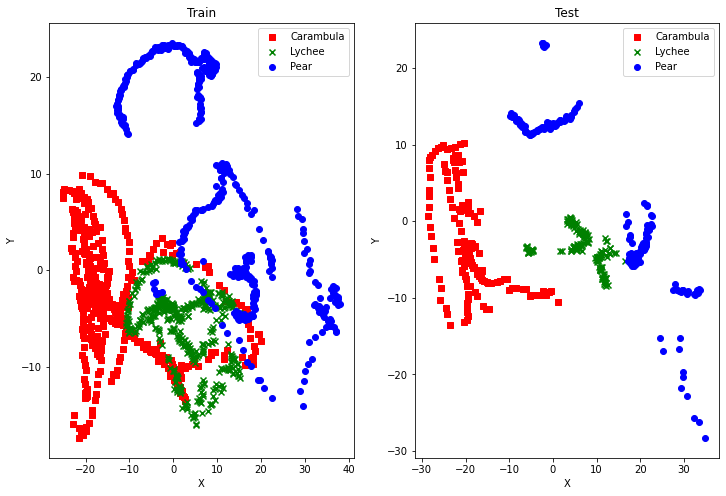

In [177]:
Prep.dimension_reduction()

In [178]:
print(Prep.x_train.shape)
print(Prep.x_test.shape)

(1470, 2)
(498, 2)


## 2-layer neural network model

In [179]:
class layer2_nn():
    def __init__(self, sizes):
        #=== define size of each layer ===#
        self.input_layer_size = sizes[0]
        self.hidden_layer_size = sizes[1]
        self.output_layer_size = sizes[2]
        
        #=== initialize weights ===#
        self.W1 = 0.01 * np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = 0.01 * np.random.randn(self.hidden_layer_size, self.output_layer_size)
        #=== initialize bisaes ===#
        self.B1 = 0.01 * np.random.randn(1, self.hidden_layer_size)
        self.B2 = 0.01 * np.random.randn(1, self.output_layer_size)
        #=== initialize gradients ===#
        self.dW1 = np.ones((self.input_layer_size, self.hidden_layer_size))
        self.dW2 = np.ones((self.hidden_layer_size, self.output_layer_size))
        self.dB1 = np.ones((1, self.hidden_layer_size))
        self.dB2 = np.ones((1, self.output_layer_size))
        
        #=== activation output ===#
        # 1. sigmoid
        self.act_out1 = np.ones((1, self.hidden_layer_size))
        # 2. soft1
        self.act_out2 = np.ones((1, self.output_layer_size))
        
        #=== Evaluation ===#
        self.train_acc = []
        self.train_loss = []
        self.val_acc = []
        self.val_loss = []

    def forward_pass(self, X):
        Z1 = np.matmul(X, self.W1) + self.B1
        act_out1 = self.sigmoid(Z1)
        Z2 = np.matmul(act_out1, self.W2) + self.B2
        act_out2 = self.softmax(Z2)
        
        self.act_out1 = act_out1
        self.act_out2 = act_out2
        
    def backward_prop(self, X, target):
        #=== gradient to W2/B2 ===#
        # derivative of softmax
        dZ2 = self.act_out2-target                  # (1,3) 
        self.dW2 = np.matmul(self.act_out1.T, dZ2)  # (5,1)*(1,3)
        self.dB2 = 1.*dZ2
        # print(f'dW2: {dW2.shape}')
        # print(f'dB2: {dB2.shape}')

        #=== gradient to W1/B1 ===#
        # derivative of sigmoid
        dA1 = self.act_out1*(1-self.act_out1)       # (1,5)
        dZ1 = dA1 * np.matmul(dZ2, self.W2.T)       # (1,3)*(3,5) = (1,5)
        self.dW1 = np.matmul(X.T, dZ1)              # (2,1)*(1,5) = (2,5)
        self.B1 = 1.*dZ1                            # (1,5)
        # print(f'dA1: {dA1.shape}')    
        # print(f'dZ1: {dZ1.shape}')
        # print(f'dW1: {dW1.shape}')
        # print(f'dB1: {dB1.shape}')
        
    def sigmoid(self, Z):
        return 1/(1+np.exp(-Z))
    
    def softmax(self, Z):
        exps = np.exp(Z)
        return exps/np.sum(exps)
    
    def update(self, lr):
        self.W1 -= lr * self.dW1
        self.B1 -= lr * self.dB1
        self.W2 -= lr * self.dW2
        self.B2 -= lr * self.dB2
    
    def acc_cal(self, target):
        y = np.argmax(target)
        y_pred = np.argmax(self.act_out2)
        if y==y_pred:
            self.correct += 1
        return y, y_pred
        
    def cross_entropy(self, target):
        '''
            L(y, ŷ) = −∑ylog(ŷ).
        '''
        self.total_loss += -np.sum(target * np.log(self.act_out2))
        
    def train(self, X, target, split_ratio, epochs, lr):
        img_size = X.shape[0]
        train_size = int(img_size*split_ratio)
        val_size = img_size-train_size

        for epoch in range(epochs):
            #=== Data Shuffling ===#
            permutation = np.random.permutation(img_size)
            X_ = X[permutation]
            target_ = target[permutation]
            
            print(f'==> epoch: {epoch}')
            self.correct = 0.
            self.total_loss = 0.
            for img in range(train_size):
                x_train = X_[img]
                y_train = target_[img]
                x_train = np.expand_dims(x_train, 0)
                y_train = np.expand_dims(y_train, 0)
                
                self.forward_pass(x_train)
                self.backward_prop(x_train, y_train)
                self.update(lr)
                self.acc_cal(y_train)
                self.cross_entropy(y_train)
            accuracy = self.correct/train_size
            loss = self.total_loss/train_size
            print(f'Train: Accuracy= {accuracy}, loss= {loss}')
            self.train_acc.append(accuracy)
            self.train_loss.append(loss)
            
            #=== Evaluation ===#
            self.correct = 0
            self.total_loss = 0
            for img in range(val_size):
                x_val = X_[img+train_size]
                y_val = target_[img+train_size]
                x_val = np.expand_dims(x_val, 0)
                y_val = np.expand_dims(y_val, 0)
                
                self.forward_pass(x_val)
                self.acc_cal(y_val)
                self.cross_entropy(y_val)
            accuracy = self.correct/val_size
            loss = self.total_loss/val_size
            print(f'Val  : Accuracy= {accuracy}, loss= {loss}')
            self.val_acc.append(accuracy)
            self.val_loss.append(loss)
            
        self.plot_train_loss(epochs)
            
    def test(self, X, target):
        img_size = X.shape[0]
        Y = []
        Y_pred = []
        self.correct = 0
        self.total_loss = 0
        for img in range(img_size):
            x_test = X[img]
            y_test = target[img]
            x_test = np.expand_dims(x_test, 0)
            y_test = np.expand_dims(y_test, 0)

            self.forward_pass(x_test)
            y, y_pred = self.acc_cal(y_test)
            self.cross_entropy(y_test)
            Y.append(y)
            Y_pred.append(y_pred)
        accuracy = self.correct/img_size
        loss = self.total_loss/img_size
        print(f'Accuracy= {accuracy}, loss= {loss}')
        
        Y = np.array(Y)
        Y_pred = np.array(Y_pred)
        self.plot_test_distribution(X, Y, Y_pred)
        return Y_pred
    
    def predict(self, X):
        img_size = X.shape[0]
        y_pred = []
        for img in range(img_size):
            x = X[img]
            x = np.expand_dims(x, 0)
            self.forward_pass(x)
            y_pred.append(np.argmax(self.act_out2))
        return np.array(y_pred)
    
    #=== Evaluation ===#
    def plot_train_loss(self, epochs):
        #=== Training/Validation Loss ===#
        epochs_ = np.linspace(1, epochs, epochs)
        train_loss_ = np.array(self.train_loss)
        val_loss_ = np.array(self.val_loss)
        fig, ax1 = plt.subplots()
        ax1.set_xlabel('Epochs', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.plot(epochs_, train_loss_, color='r', label='Training Loss')
        ax1.plot(epochs_, val_loss_, color='b', label='Validation Loss')
        plt.legend(loc='center right', fontsize=10)
        plt.savefig("layer2_train_loss.png", dpi=120)
        plt.show()
        
    def plot_test_distribution(self, x_test, y_test, y_pred):
        target_names = ['Carambula', 'Lychee', 'Pear']
        targets = [0, 1, 2]
        fig = plt.figure(figsize=(12, 8))
        plt1_1 = fig.add_subplot(121)
        plt1_2 = fig.add_subplot(122)
        
        #=== Ground Truth ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_test==target)[0]
            plt1_1.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_1.set_title('Ground Truth')
        plt1_1.set_xlabel('X')
        plt1_1.set_ylabel('Y')
        plt1_1.legend()
        
        #=== Predict ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_pred==target)[0]
            plt1_2.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_2.set_title('Predict')
        plt1_2.set_xlabel('X')
        plt1_2.set_ylabel('Y')
        plt1_2.legend()
        plt.savefig("layer2_test_distribution.png", dpi=120)
        plt.show()
        

In [180]:
def plot_decision_regions(X, target, MLP, hidden_size, resolution=0.02):
    #=== Decision Region: Predict by NN model ===#
    cmap = ListedColormap(['r','g','b'])
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_2d, y_2d = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    y_pred = MLP.predict(np.array([x_2d.ravel(), y_2d.ravel()]).T)
    y_pred = y_pred.reshape(x_2d.shape)
    plt.figure(figsize=(14, 10))
    plt.contourf(x_2d, y_2d, y_pred, alpha=0.3, cmap=cmap)
    
    #=== Ground Truth ===#
    y = np.argmax(target, axis=1)
    target_names = ['Carambula', 'Lychee', 'Pear']
    targets = [0, 1, 2]
    for target_, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
        label_idx = np.where(y==target_)[0]
        plt.scatter(X[label_idx, 0], X[label_idx, 1], label=target_name, c=c, marker=marker)
        
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
    plt.title(f'Decision Region ({hidden_size}-Layer NN)', fontsize=20)
    plt.legend()
    plt.savefig(f'layer{hidden_size}_decision_region.png', dpi=100)

In [181]:
X = Prep.x_train
print(f'X shape: {X.shape}')
target = Prep.y_train_onehot
print(f'target shape: {target.shape}')

X shape: (1470, 2)
target shape: (1470, 3)


## Train the model with cross-validation

==> epoch: 0
Train: Accuracy= 0.7108843537414966, loss= 0.694355197458989
Val  : Accuracy= 0.8027210884353742, loss= 0.4853518569823491
==> epoch: 1
Train: Accuracy= 0.8350340136054422, loss= 0.4737546887593637
Val  : Accuracy= 0.8333333333333334, loss= 0.47976263069994635
==> epoch: 2
Train: Accuracy= 0.8214285714285714, loss= 0.4588374694843909
Val  : Accuracy= 0.8401360544217688, loss= 0.4200182704224623
==> epoch: 3
Train: Accuracy= 0.8282312925170068, loss= 0.4478893141816264
Val  : Accuracy= 0.8503401360544217, loss= 0.4230782477642441
==> epoch: 4
Train: Accuracy= 0.8350340136054422, loss= 0.4466427683323567
Val  : Accuracy= 0.826530612244898, loss= 0.4106407457120345
==> epoch: 5
Train: Accuracy= 0.83078231292517, loss= 0.43300076547831184
Val  : Accuracy= 0.8367346938775511, loss= 0.4523355143786825
==> epoch: 6
Train: Accuracy= 0.842687074829932, loss= 0.4293835730170558
Val  : Accuracy= 0.8299319727891157, loss= 0.44437864466552507
==> epoch: 7
Train: Accuracy= 0.82738095238

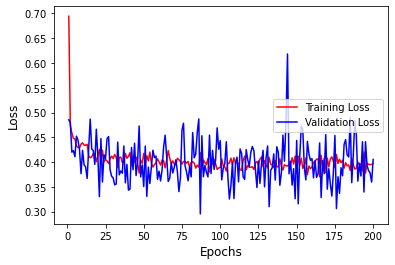

In [182]:
layer_sizes = [2, 20, 3]
MLP = layer2_nn(layer_sizes)
MLP.train(X, target, split_ratio=0.8, epochs=200, lr=0.01)

In [183]:
X = Prep.x_test
print(X.shape)
print(f'X shape: {X.shape}')
target = Prep.y_test_onehot
print(f'target shape: {target.shape}')

(498, 2)
X shape: (498, 2)
target shape: (498, 3)


## Test the model

Accuracy= 0.9036144578313253, loss= 0.25376182873364084


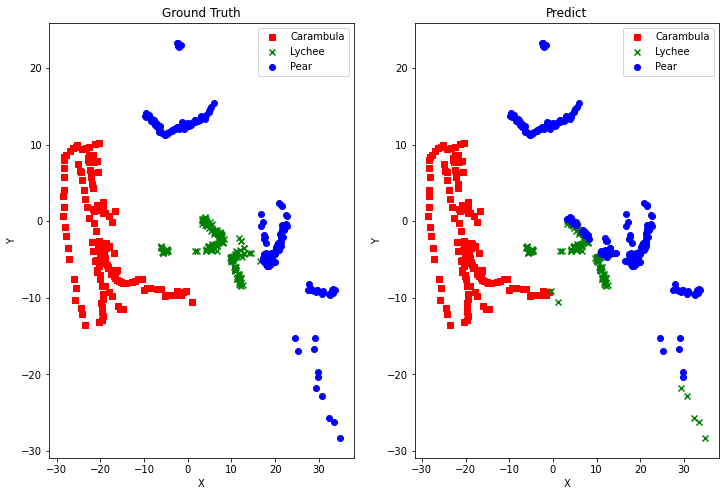

Predict: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 1 2 2 2 2 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 2
 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

In [184]:
y_pred = MLP.test(X, target)
print(f'Predict: \n{y_pred}\n')

In [185]:
print(f'Target:  \n{Prep.y_test}\n')

Target:  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

## Decision Region

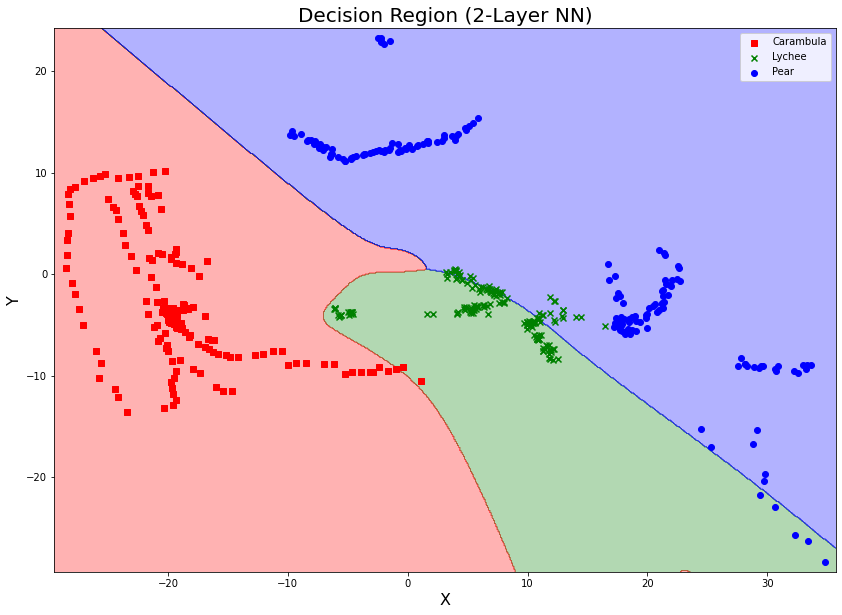

In [186]:
plot_decision_regions(X, target, MLP, hidden_size=2, resolution=0.1)

## 3-layer neural network model

In [187]:
class layer3_nn():
    def __init__(self, sizes):
        #=== define size of each layer ===#
        self.input_layer_size = sizes[0]
        self.hidden_layer1_size = sizes[1]
        self.hidden_layer2_size = sizes[2]
        self.output_layer_size = sizes[3]
        
        #=== initialize weights ===#
        self.W1 = 0.1 * np.random.randn(self.input_layer_size, self.hidden_layer1_size)
        self.W2 = 0.1 * np.random.randn(self.hidden_layer1_size, self.hidden_layer2_size)
        self.W3 = 0.1 * np.random.randn(self.hidden_layer2_size, self.output_layer_size)
        #=== initialize bisaes ===#
        self.B1 = 0.1 * np.random.randn(1, self.hidden_layer1_size)
        self.B2 = 0.1 * np.random.randn(1, self.hidden_layer2_size)
        self.B3 = 0.1 * np.random.randn(1, self.output_layer_size)
        #=== initialize gradients ===#
        self.dW1 = np.ones((self.input_layer_size, self.hidden_layer1_size))
        self.dW2 = np.ones((self.hidden_layer1_size, self.hidden_layer2_size))
        self.dW3 = np.ones((self.hidden_layer2_size, self.output_layer_size))
        self.dB1 = np.ones((1, self.hidden_layer1_size))
        self.dB2 = np.ones((1, self.hidden_layer2_size))
        self.dB3 = np.ones((1, self.output_layer_size))
        
        #=== activation output ===#
        # 1. sigmoid
        self.act_out1 = np.ones((1, self.hidden_layer1_size))
        self.act_out2 = np.ones((1, self.hidden_layer2_size))
        # 2. softmax
        self.act_out3 = np.ones((1, self.output_layer_size))
        
        #=== Evaluation ===#
        self.train_acc = []
        self.train_loss = []
        self.val_acc = []
        self.val_loss = []

    def forward_pass(self, X):
        Z1 = np.matmul(X, self.W1) + self.B1
        act_out1 = self.sigmoid(Z1)
        Z2 = np.matmul(act_out1, self.W2) + self.B2
        act_out2 = self.sigmoid(Z2)
        Z3 = np.matmul(act_out2, self.W3) + self.B3
        act_out3 = self.softmax(Z3)
        
        self.act_out1 = act_out1
        self.act_out2 = act_out2
        self.act_out3 = act_out3
        
    def backward_prop(self, X, target):
        #=== gradient to W3/B3 ===#
        # derivative of softmax
        dZ3 = self.act_out3-target                  # (1,3) 
        self.dW3 = np.matmul(self.act_out2.T, dZ3)  # (5,1)*(1,3)
        self.dB3 = 1.*dZ3
        # print(f'dW3: {dW3.shape}')
        # print(f'dB3: {dB3.shape}')
        
        #=== gradient to W2/B2 ===#
        # derivative of sigmoid
        dA2 = self.act_out2*(1-self.act_out2)       # (1,5)
        dZ2 = dA2 * np.matmul(dZ3, self.W3.T)       # (1,3)*(3,5) = (1,5)
        self.dW2 = np.matmul(self.act_out1.T, dZ2)  # (5,1)*(1,5) = (5,5)
        self.dB2 = 1.*dZ2                           # (1,5)
        # print(f'dA2: {dA2.shape}')    
        # print(f'dZ2: {dZ2.shape}')
        # print(f'dW2: {dW2.shape}')
        # print(f'dB2: {dB2.shape}')

        #=== gradient to W1/B1 ===#
        # derivative of sigmoid
        dA1 = self.act_out1*(1-self.act_out1)       # (1,5)
        dZ1 = dA1 * np.matmul(dZ2, self.W2.T)       # (1,5)*(5,5) = (1,5)
        self.dW1 = np.matmul(X.T, dZ1)              # (2,1)*(1,5) = (2,5)
        self.dB1 = 1.*dZ1                           # (1,5)
        # print(f'dA1: {dA1.shape}')    
        # print(f'dZ1: {dZ1.shape}')
        # print(f'dW1: {dW1.shape}')
        # print(f'dB1: {dB1.shape}')
        
    def sigmoid(self, Z):
        return 1/(1+np.exp(-Z))
    
    def softmax(self, Z):
        exps = np.exp(Z)
        return exps/np.sum(exps)
    
    def update(self, lr):
        self.W1 -= lr * self.dW1
        self.B1 -= lr * self.dB1
        self.W2 -= lr * self.dW2
        self.B2 -= lr * self.dB2
        self.W3 -= lr * self.dW3
        self.B3 -= lr * self.dB3
    
    def acc_cal(self, target):
        y = np.argmax(target)
        y_pred = np.argmax(self.act_out3)
        if y==y_pred:
            self.correct += 1
        return y, y_pred
    
    def cross_entropy(self, target):
        '''
            L(y, ŷ) = −∑ylog(ŷ).
        '''
        self.total_loss += -np.sum(target * np.log(self.act_out3))
        
    def train(self, X, target, split_ratio, epochs, lr):
        img_size = X.shape[0]
        train_size = int(img_size*split_ratio)
        val_size = img_size-train_size

        for epoch in range(epochs):
            #=== Data Shuffling ===#
            permutation = np.random.permutation(img_size)
            X_ = X[permutation]
            target_ = target[permutation]
            
            print(f'==> epoch: {epoch}')
            self.correct = 0.
            self.total_loss = 0.
            for img in range(train_size):
                x_train = X_[img]
                y_train = target_[img]
                x_train = np.expand_dims(x_train, 0)
                y_train = np.expand_dims(y_train, 0)
                
                self.forward_pass(x_train)
                self.backward_prop(x_train, y_train)
                self.update(lr)
                self.acc_cal(y_train)
                self.cross_entropy(y_train)
            accuracy = self.correct/train_size
            loss = self.total_loss/train_size
            print(f'Train: Accuracy= {accuracy}, loss= {loss}')
            self.train_acc.append(accuracy)
            self.train_loss.append(loss)
            
            #=== Evaluation ===#
            self.correct = 0
            self.total_loss = 0
            for img in range(val_size):
                x_val = X_[img+train_size]
                y_val = target_[img+train_size]
                x_val = np.expand_dims(x_val, 0)
                y_val = np.expand_dims(y_val, 0)
                
                self.forward_pass(x_val)
                self.acc_cal(y_val)
                self.cross_entropy(y_val)
            accuracy = self.correct/val_size
            loss = self.total_loss/val_size
            print(f'Val  : Accuracy= {accuracy}, loss= {loss}')
            self.val_acc.append(accuracy)
            self.val_loss.append(loss)
            
        self.plot_train_loss(epochs)
            
    def test(self, X, target):
        img_size = X.shape[0]
        Y = []
        Y_pred = []
        self.correct = 0
        self.total_loss = 0
        for img in range(img_size):
            x_test = X[img]
            y_test = target[img]
            x_test = np.expand_dims(x_test, 0)
            y_test = np.expand_dims(y_test, 0)

            self.forward_pass(x_test)
            y, y_pred = self.acc_cal(y_test)
            self.cross_entropy(y_test)
            Y.append(y)
            Y_pred.append(y_pred)
        accuracy = self.correct/img_size
        loss = self.total_loss/img_size
        print(f'Accuracy= {accuracy}, loss= {loss}')
        
        Y = np.array(Y)
        Y_pred = np.array(Y_pred)
        self.plot_test_distribution(X, Y, Y_pred)
        return Y_pred
    
    def predict(self, X):
        img_size = X.shape[0]
        y_pred = []
        for img in range(img_size):
            x = X[img]
            x = np.expand_dims(x, 0)
            self.forward_pass(x)
            y_pred.append(np.argmax(self.act_out3))
        return np.array(y_pred)
    
    #=== Evaluation ===#
    def plot_train_loss(self, epochs):
        #=== Training/Validation Loss ===#
        epochs_ = np.linspace(1, epochs, epochs)
        train_loss_ = np.array(self.train_loss)
        val_loss_ = np.array(self.val_loss)
        fig, ax1 = plt.subplots()
        ax1.set_xlabel('Epochs', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.plot(epochs_, train_loss_, color='r', label='Training Loss')
        ax1.plot(epochs_, val_loss_, color='b', label='Validation Loss')
        plt.legend(loc='center right', fontsize=10)
        plt.savefig("layer3_train_loss.png", dpi=120)
        plt.show()
        
    def plot_test_distribution(self, x_test, y_test, y_pred):
        target_names = ['Carambula', 'Lychee', 'Pear']
        targets = [0, 1, 2]
        fig = plt.figure(figsize=(12, 8))
        plt1_1 = fig.add_subplot(121)
        plt1_2 = fig.add_subplot(122)
        #=== Ground Truth ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_test==target)[0]
            plt1_1.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_1.set_title('Ground Truth')
        plt1_1.set_xlabel('X')
        plt1_1.set_ylabel('Y')
        plt1_1.legend()
        
        #=== Predict ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_pred==target)[0]
            plt1_2.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_2.set_title('Predict')
        plt1_2.set_xlabel('X')
        plt1_2.set_ylabel('Y')
        plt1_2.legend()
        plt.savefig("layer3_test_distribution.png", dpi=120)
        plt.show()

In [188]:
X = Prep.x_train
print(f'X shape: {X.shape}')
target = Prep.y_train_onehot
print(f'target shape: {target.shape}')

X shape: (1470, 2)
target shape: (1470, 3)


## Train the model with cross-validation

==> epoch: 0
Train: Accuracy= 0.5391156462585034, loss= 0.9841463511363536
Val  : Accuracy= 0.7346938775510204, loss= 0.7699014874906028
==> epoch: 1
Train: Accuracy= 0.7091836734693877, loss= 0.6607625822288689
Val  : Accuracy= 0.7040816326530612, loss= 0.5981175762395187
==> epoch: 2
Train: Accuracy= 0.7508503401360545, loss= 0.5737230288365206
Val  : Accuracy= 0.7959183673469388, loss= 0.5696424635594675
==> epoch: 3
Train: Accuracy= 0.7916666666666666, loss= 0.5309798594289515
Val  : Accuracy= 0.7891156462585034, loss= 0.5359385048729614
==> epoch: 4
Train: Accuracy= 0.8069727891156463, loss= 0.5092870713375652
Val  : Accuracy= 0.7380952380952381, loss= 0.5001934469698718
==> epoch: 5
Train: Accuracy= 0.8333333333333334, loss= 0.45725209571928777
Val  : Accuracy= 0.8061224489795918, loss= 0.47724745876007674
==> epoch: 6
Train: Accuracy= 0.8316326530612245, loss= 0.4383574269536216
Val  : Accuracy= 0.8299319727891157, loss= 0.4569466314554539
==> epoch: 7
Train: Accuracy= 0.8290816

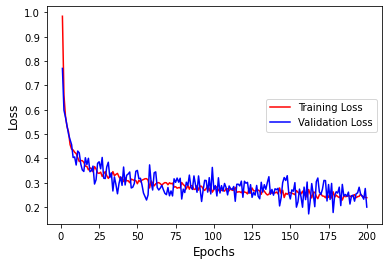

In [189]:
layer_sizes = [2, 20, 20, 3]
MLP = layer3_nn(layer_sizes)
MLP.train(X, target, split_ratio=0.8, epochs=200, lr=0.01)

In [190]:
X = Prep.x_test
print(X.shape)
print(f'X shape: {X.shape}')
target = Prep.y_test_onehot
print(f'target shape: {target.shape}')

(498, 2)
X shape: (498, 2)
target shape: (498, 3)


## Test the model

Accuracy= 0.9678714859437751, loss= 0.15986797519292112


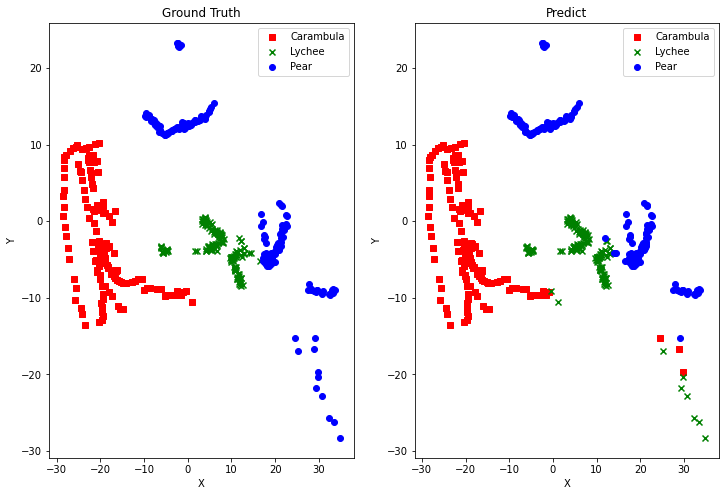

Predict: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 2 1 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

In [191]:
y_pred = MLP.test(X, target)
print(f'Predict: \n{y_pred}\n')

In [192]:
print(f'Target:  \n{Prep.y_test}\n')

Target:  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

## Decision Region

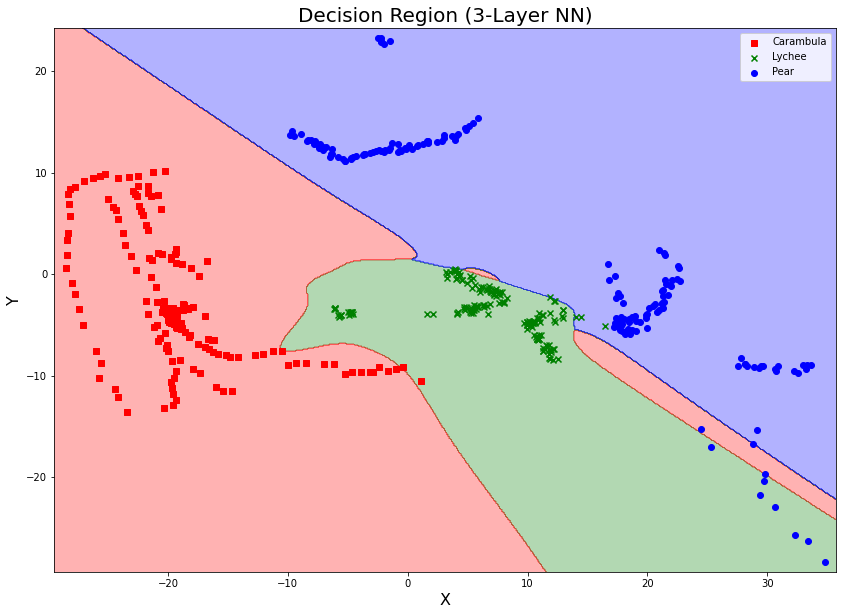

In [193]:
plot_decision_regions(X, target, MLP, hidden_size=3, resolution=0.1)